In [102]:
import pandas as pd
import json
import re

# 4chan -> Low level moderation (moderation varies from board to board but in escence all illegal related content is removed), aside from ilegal content, the board is also moderated for spam and other types of abuse. The majority of speech aside from that is allowed.

## Cleaning text and performing a base level analysis

In [103]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('../Data/data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [104]:
df.head()

,title,comment
0,All the cool kids are doing it.,&gt;&gt;400714173&gt;no pepe what are you doin...
1,All the cool kids are doing it.,&gt;&gt;400708757https://www.youtube.com/watch...
2,All the cool kids are doing it.,&gt;&gt;400713918&gt;if you don&#039;t like th...
3,All the cool kids are doing it.,&gt;&gt;400708823And I wonder how many big ole...
4,All the cool kids are doing it.,&gt;&gt;400714594Vatniggers get into the meat ...


In [105]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [106]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Remove any website links
    text = re.sub(r'http\S+', '', text)
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ'] and len(token.text) > 3 and 'quot' not in token.text]
    return text

In [107]:
# apply the clean_text function to the dataframe
# df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [108]:
# remove comments with less than 3 words
df = df[df['comment'].apply(lambda x: len(x) > 3)]

In [109]:
df.head()

,title,comment
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian..."
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ..."
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]"
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h..."
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]"


In [110]:
# lets create a new column with the length of the comment
df['length'] = df['comment'].apply(lambda x: len(x))

In [145]:
df.shape

(4696, 10)

## Sentiment and Subjectivity Analysis

In [111]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [112]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

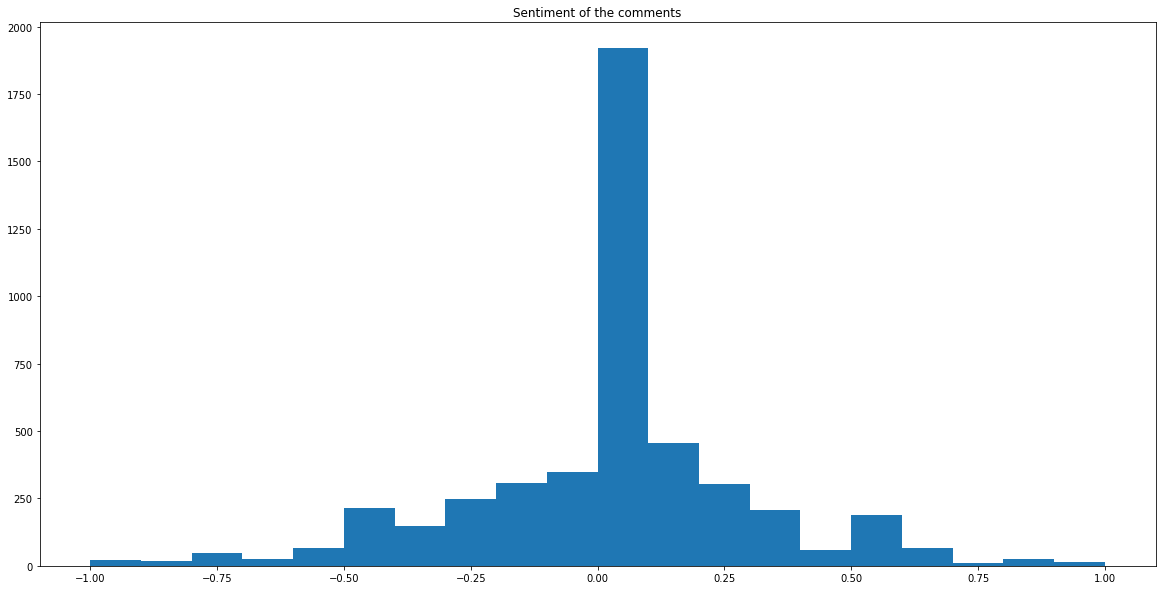

In [113]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(df['sentiment'], bins=20)
plt.title('Sentiment of the comments')
plt.show()

In [114]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,length,sentiment
5330,Why do people keep telling me the left looks l...,"[berberid, phenotype, they, retard]",4,-0.90
7165,"Well, it&#039;s been a year since Alec Baldwin...","[guys, anger, management, classes]",4,-0.70
1169,Christkikes are kikes with low IQ and they cre...,"[authority, bible, position, humble, yourself,...",10,-0.55
6999,"Now that the dust has settled, why did “mental...","[hell, mental, illness, bullshit, retard, ther...",13,-0.55
6151,This shit is genuinely dangerous. I don&#039;t...,"[random, ties, building, them, them, boogeyman...",9,-0.75


In [115]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,length,sentiment
6629,is there any proof that &quot;long covid&quot;...,"[studies, good, that, vaccines, autism, which,...",13,0.7
4305,So what happened to the farms?Did the troons win?,"[fair, federal, crime, that, what, resume]",6,0.7
7413,are they really the same?,"[there, pubic, hair, head, lmao]",5,0.6
7720,Are you clowns fucking kidding me? PERMANENT F...,"[lmgtfy, downvotes, good, russtles]",4,0.7
5774,Do people actually think France still exist ? ...,"[what, kind, cope, this]",4,0.6


In [116]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.subjectivity)

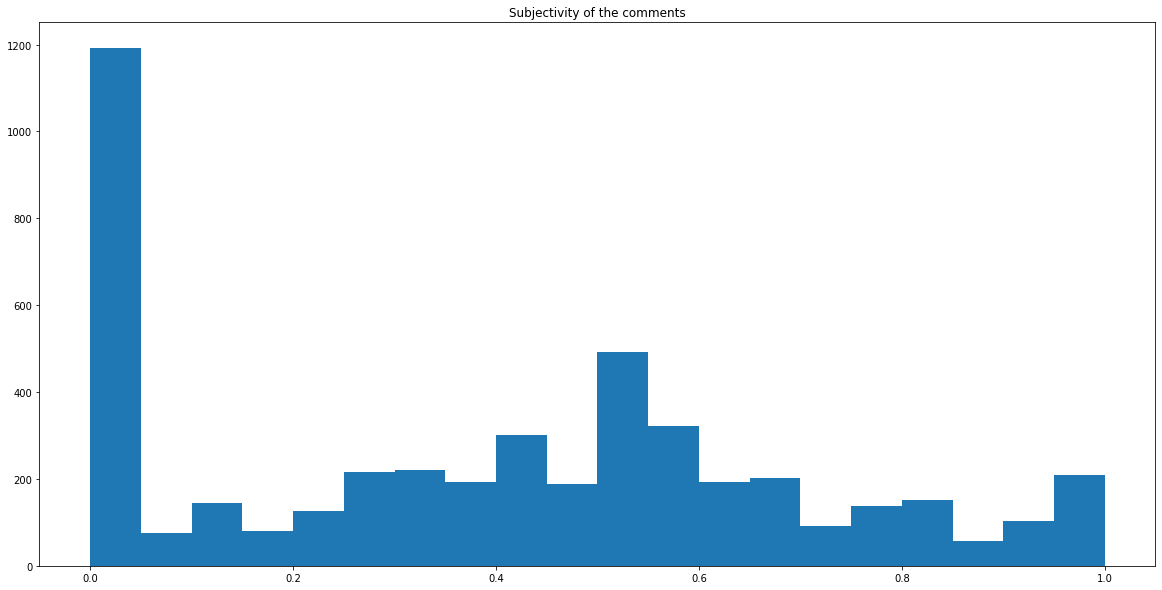

In [117]:
# lets plot the subjectivity of the comments
plt.figure(figsize=(20, 10))
plt.hist(df['subjectivity'], bins=20)
plt.title('Subjectivity of the comments')
plt.show()

In [118]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
1189,Is &quot;Uprising&quot; the most based song/ly...,"[their, gayest, song, muse, absolution, everyt...",11,-0.042857,0.625000
346,&gt;Woman becomes chadwe got too cocky anti tr...,"[what, fuck, beard, style, good, pencil, thin,...",40,-0.157143,0.582143
2475,WHAT ARE THE POLITICAL IMPLICATIONS OF NIGGERS...,"[snopes, jews, slave, ships, falsethere, ships...",20,-0.200000,0.550000
5302,It&#039;s over. Time to ban walkable streets a...,"[sense, south, korea, high, level, scandals, s...",10,0.160000,0.540000
1382,This shithole of a country gets what it deserv...,"[brexit, they, butthurtyou, patheticnow, fucki...",8,-0.600000,0.800000


In [119]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
5171,&gt;Elon and 200 other elites are meeting in D...,"[timid, chick, first, chirp, emboldened, line,...",15,0.475,0.466667
3937,Remember the AIDS scare? What happened to that...,"[gays, there, speculation, real, fags, medicat...",7,0.200,0.300000
7056,They made this decision over a 2 minute phone ...,"[month, people, this, this, show, people, adid...",10,0.000,0.000000
5710,You guys do understand the real reason why Elo...,"[contract, epic, tantrum, company, retaliation...",10,0.300,0.450000
3080,"holy shit /pol/ you were right, these people a...","[youtube, watch, unqabxu, feature, logoat, lea...",13,-0.250,0.300000


61242


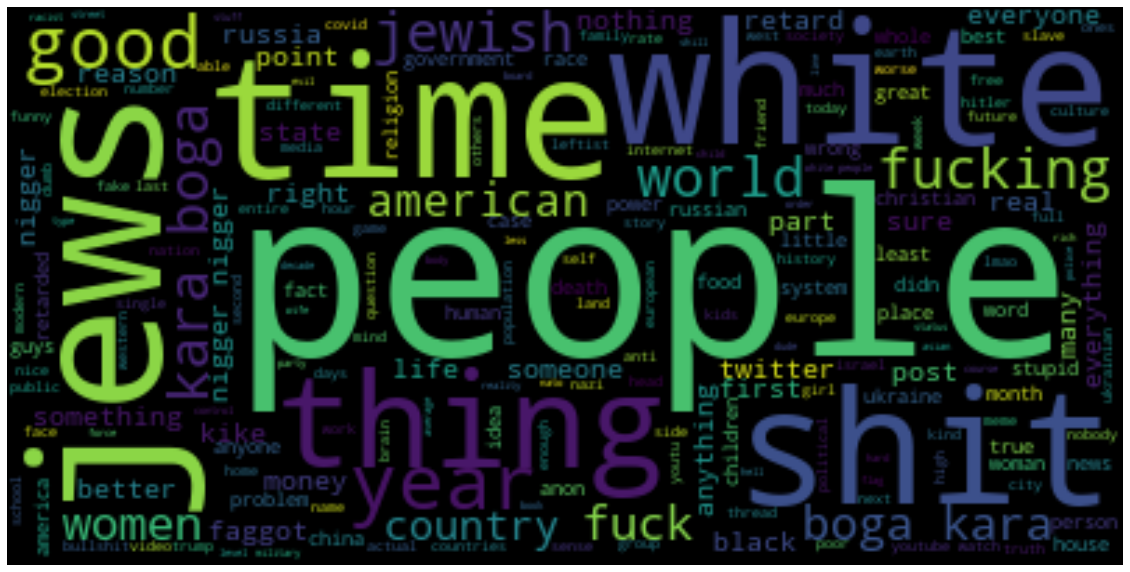

In [150]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.extend(comment)

print(len(all_comments)) # the number of unique words in the comments

# create a word cloud object
wordcloud = WordCloud().generate(' '.join(all_comments))

# plot the word cloud, make it larger
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

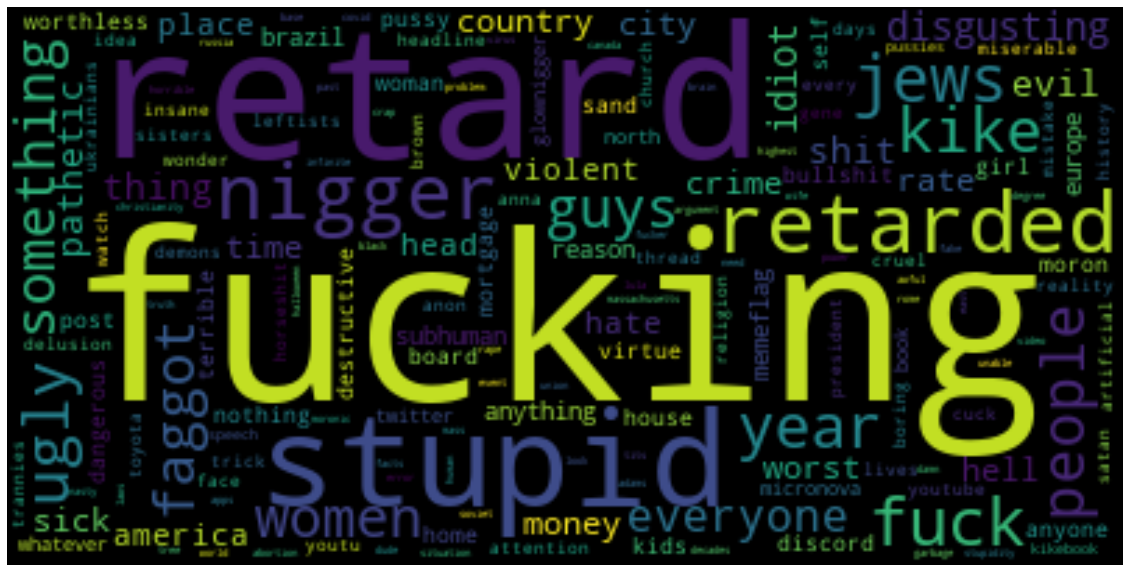

In [149]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [122]:
# check how many unique words are in the comments
total_unique = len(all_comments)

total_words = 0
for comment in df['comment']:
    total_words += len(comment)

# average unique words per comment
unique_words_by_comment = total_unique / total_words
unique_words_by_comment

1.0

In [123]:
total_words

61242

In [124]:
# check how many average words are in the comments
average_words_by_comment = sum(df['length']) / len(df)
average_words_by_comment

13.041311754684838

## Hate Analysis in 4chan: A Case Study
### We scraped data from -> https://en.wikipedia.org/wiki/List_of_ethnic_slurs to generate a hate term corpus which then we used to calculate hate scores for each post in 4chan. Then we calculated the hate score for each thread and plotted the results.

In [125]:
# load the 2 other data frames to check on hate speech
df_hate = pd.read_csv('../../GeneralData/ethnic_slurs.csv')
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [126]:
# r strip Location column
df_hate['Location'] = df_hate['Location'].apply(lambda x: x.rstrip())
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [127]:
# make a set of all unique words in Term 
hate_terms = set()
for term in df_hate['Term']:
    for word in term.split():
        if len(word) < 4:
            continue
        hate_terms.add(word)

In [128]:
# check if the comments contain any of the hate words
hate_score = []
for comment in df['comment']:
    hate_count = 0
    for content in comment:
        for word in hate_terms:
            if word in content:
                hate_count += 1

    hate_score.append(hate_count)

# add the hate score to the dataframe
df['hate_score'] = hate_score
df.head()
                

,title,comment,length,sentiment,subjectivity,hate_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0


In [129]:
df.head(20)

,title,comment,length,sentiment,subjectivity,hate_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2


In [130]:
# get the top 5 rows with the highest hate score
df.sort_values(by='hate_score', ascending=False).head(5)

,title,comment,length,sentiment,subjectivity,hate_score
4981,He is mostly known for not being Michael Jorda...,"[nigger, nigger, nigger, nigger, nigger, nigge...",113,0.000000,0.000000,113
5092,your corrupt right wing politicians are crumbl...,"[this, spam, thread, faggot, niggers, obvious,...",88,0.000000,0.500000,22
3768,What do I put on it /pol/?,"[nigger, niggerniggerniggernigger, niggernigge...",16,0.000000,0.000000,16
7756,&gt;read reddit&gt;everybody is predicting a b...,"[king, kanye, west, settlement, former, employ...",118,-0.069805,0.325974,15
7053,All non-Whites are the result of Cro-Magnon (W...,"[theory, they, africans, wrong, releases, htmh...",123,-0.007237,0.210526,15


In [131]:
# Get the percentage of hate score devided by the total length of the comment
df['hate_score_percentage'] = df['hate_score'] / df['length'] * 100
df.head()

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.5
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.0


### Percentage of Hate Score out of total comments -> 6.02%

In [132]:
# get the sum of the total hate score / sum of the total length of the comment * 100
percentage_total_hate = df['hate_score'].sum() / df['length'].sum() * 100
f"{percentage_total_hate:.2f}%"

'6.04%'

In [133]:
# get the top 5 rows with the highest hate score percentage, where length > 5
df[df['length'] > 5].sort_values(by='hate_score_percentage', ascending=False).head(7)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage
3768,What do I put on it /pol/?,"[nigger, niggerniggerniggernigger, niggernigge...",16,0.000000,0.000000,16,100.000000
4981,He is mostly known for not being Michael Jorda...,"[nigger, nigger, nigger, nigger, nigger, nigge...",113,0.000000,0.000000,113,100.000000
1940,Intredasting we are not having BBC treads righ...,"[white, male, japanese, korean, female, thread]",6,0.000000,0.066667,5,83.333333
7876,He says that Jews are racially superior to all...,"[sandcoons, easy, yourself, superior, brown, s...",7,0.566667,0.866667,4,57.142857
1173,&gt;There&#039;s nobody that gets judged more ...,"[kanye, clever, niggers, chicago, black, versi...",8,0.000000,0.422222,4,50.000000
5254,is anime a ZOG tool to undermine western mascu...,"[nobody, white, goyim, japanese, cartoons, meds]",6,0.000000,0.000000,3,50.000000
7189,Is this the most accurate grouping of races?,"[talented, wealthy, whiteyou, mind, average, a...",6,0.350000,0.766667,3,50.000000


### Analysing offensive speech

In [134]:
# load csv as list
import csv
with open('../../GeneralData/offensive_words.csv', 'r') as f:
    reader = csv.reader(f)
    offensive_words = list(reader)[1:]

offensive_words = [word[0] for word in offensive_words]
offensive_words

['arse',
 'arsehead',
 'arsehole',
 'ass',
 'asshole',
 'bastard',
 'bithc',
 'bloody',
 'blood',
 'bollocks',
 'brotherfucker',
 'bugger',
 'bullshit',
 'childfucker',
 'cock',
 'cocksucker',
 'crap',
 'cunt',
 'damn',
 'dick',
 'dickhead',
 'dyke',
 'fatherfucker',
 'frigger',
 'fuck',
 'goddamn',
 'godsdamn',
 'hell',
 'holy shit',
 'horseshit',
 'jesus fuck',
 'kike',
 'motherfucker',
 'nigga',
 'nigra',
 'nigger',
 'piss',
 'prick',
 'pussy',
 'shit',
 'shit ass',
 'shite',
 'sisterfucker',
 'slut',
 'son of a bithc',
 'son of a whore',
 'spastic',
 'twat',
 'wanker']

In [135]:
# check if the comments contain any of the offensive words
offensive_score = []
for comment in df['comment']:
    offensive_count = 0
    for content in comment:
        for word in offensive_words:
            if word in content:
                offensive_count += 1

    offensive_score.append(offensive_count)

# add the offensive score to the dataframe
df['offensive_score'] = offensive_score
df.head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.500000,0
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.000000,1
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.000000,0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.000000,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.000000,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4,23.529412,1
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2,16.666667,0
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1,9.090909,0
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1,6.250000,0
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8


In [136]:
# get the top 5 rows with the highest offensive score
df.sort_values(by='offensive_score', ascending=False).head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score
4981,He is mostly known for not being Michael Jorda...,"[nigger, nigger, nigger, nigger, nigger, nigge...",113,0.000000,0.000000,113,100.000000,113
5092,your corrupt right wing politicians are crumbl...,"[this, spam, thread, faggot, niggers, obvious,...",88,0.000000,0.500000,22,25.000000,22
3768,What do I put on it /pol/?,"[nigger, niggerniggerniggernigger, niggernigge...",16,0.000000,0.000000,16,100.000000,16
2364,Previous: &gt;&gt;402026522Timeline /tug/: htt...,[hahahahahahahahahaaahjahahhhhhhhhhhhhhhahahah...,75,0.008036,0.619643,0,0.000000,12
749,Let&#039;s have a discussion about literal ver...,"[slaves, butthurt, rebellion, higher, dimensio...",98,0.036458,0.526389,9,9.183673,10
4706,My top 3 most redpilled songs:Saint PabloNew S...,"[that, pussy, niggas, pussy, contracts, meyou,...",26,0.000000,0.000000,0,0.000000,10
973,"Why do you hate me, anon?","[holy, shit, mindsi, stupid, kike, fuckface, l...",42,-0.301667,0.591667,4,9.523810,9
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8
5215,Kikes banned Ye from Instagram for 30 days,"[heyhey, fucking, linkyou, fucking, niggerfuck...",9,-0.550000,0.750000,2,22.222222,8
982,Oldfags onlyWere things ACTUALLY better 20 yea...,"[thing, that, most, quality, food, everything,...",65,-0.181250,0.641667,1,1.538462,7


In [137]:
percentage_total_offensive = df['offensive_score'].sum() / df['length'].sum() * 100
f"{percentage_total_offensive:.2f}%"

'3.68%'

### Violence Analysis

In [138]:
# Read Csv as list
with open('../../GeneralData/violent_words.csv', 'r') as f:
    reader = csv.reader(f)
    violent_words = list(reader)[1:]

violent_words = [word[0] for word in violent_words]
violent_words

['acid',
 'aggressor',
 'agitator',
 'aim',
 'alert',
 'ambush',
 'ammunition',
 'anarchy',
 'anguish',
 'annihilate',
 'apartheid',
 'arms',
 'arsenal',
 'artillery',
 'assassin',
 'assassinate',
 'assault',
 'atrocity',
 'attack',
 'authority',
 'automatic',
 'faction',
 'fanatic',
 'fatal',
 'fear',
 'fearful',
 'felon',
 'ferment',
 'ferocious',
 'feud',
 'fierce',
 'fiery',
 'fight',
 'fighter',
 'force',
 'forceful',
 'forces',
 'fray',
 'frenzy',
 'front',
 'lines',
 'fuel',
 'fugitive',
 'furtive',
 'cadaver',
 'camouflage',
 'campaign',
 'captive',
 'capture',
 'careen',
 'carnage',
 'casualties',
 'cataclysm',
 'causes',
 'chaos',
 'charge',
 'charred',
 'checking',
 'clandestine',
 'clash',
 'coalition',
 'collapse',
 'combat',
 'commandos',
 'concentration',
 'concussion',
 'conflagration',
 'conflict',
 'confrontation',
 'conquer',
 'consequences',
 'consolidate',
 'conspiracy',
 'conspire',
 'control',
 'coordinates',
 'corpse',
 'counterattack',
 'countermand',
 'crash',

In [139]:
# check if the comments contain any of the violent words
violent_score = []
for comment in df['comment']:
    violent_count = 0
    for content in comment:
        for word in violent_words:
            if word in content:
                violent_count += 1

    violent_score.append(violent_count)

# add the violent score to the dataframe
df['violent_score'] = violent_score
df.head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score,violent_score
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.500000,0,2
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.000000,1,1
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.000000,0,0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.000000,0,0
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.000000,0,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4,23.529412,1,3
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2,16.666667,0,1
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1,9.090909,0,0
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1,6.250000,0,1
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8,5


In [140]:
percentage_total_violent = df['violent_score'].sum() / df['length'].sum() * 100
f"{percentage_total_violent:.2f}%"

'7.01%'

## Lets do some natural clustering analysis, let's see how many natural clusters we can find in the data

In [141]:
# Perform a natural clustering on the comments
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# create a list of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.append(' '.join(comment))

# create a tfidf vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# fit the vectorizer to the comments
X = vectorizer.fit_transform(all_comments)

# create a kmeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# fit the kmeans object to the vectorizer
kmeans.fit(X)

# get the cluster labels
labels = kmeans.labels_

# add the cluster labels to the dataframe
df['cluster'] = labels
df.head(10)

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage,offensive_score,violent_score,cluster
2,All the cool kids are doing it.,"[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1,12.500000,0,2,0
3,All the cool kids are doing it.,"[many, brains, titanic, imagery, their, meme, ...",9,0.150000,0.650000,0,0.000000,1,1,0
7,&gt;Two 16-year-old twins escaped from their a...,"[they, black, nobody, this]",4,-0.166667,0.433333,1,25.000000,0,0,0
9,&gt;Two 16-year-old twins escaped from their a...,"[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0,0.000000,0,0,2
13,&gt;State Sen. Scott Wiener is mobilizing alli...,"[this, paper, everything, italy, crooked]",5,0.000000,0.100000,0,0.000000,0,0,0
14,"As history our guide: they jack up prices, peo...","[leftists, world, nuclear, hellscape, exchange...",17,0.000000,0.000000,4,23.529412,1,3,3
16,This is what happens when you pay them $15 an ...,"[real, economies, western, nations, permanent,...",12,0.100000,0.150000,2,16.666667,0,1,0
17,This is what happens when you pay them $15 an ...,"[window, years, last, less, drain, everyone, b...",11,-0.208333,0.408333,1,9.090909,0,0,0
18,This is what happens when you pay them $15 an ...,"[today, sovereign, debt, crisis, itself, infla...",16,0.416667,0.500000,1,6.250000,0,1,0
19,This is what happens when you pay them $15 an ...,"[companies, shit, mass, offs, shit, benefits, ...",28,0.008333,0.750000,2,7.142857,8,5,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


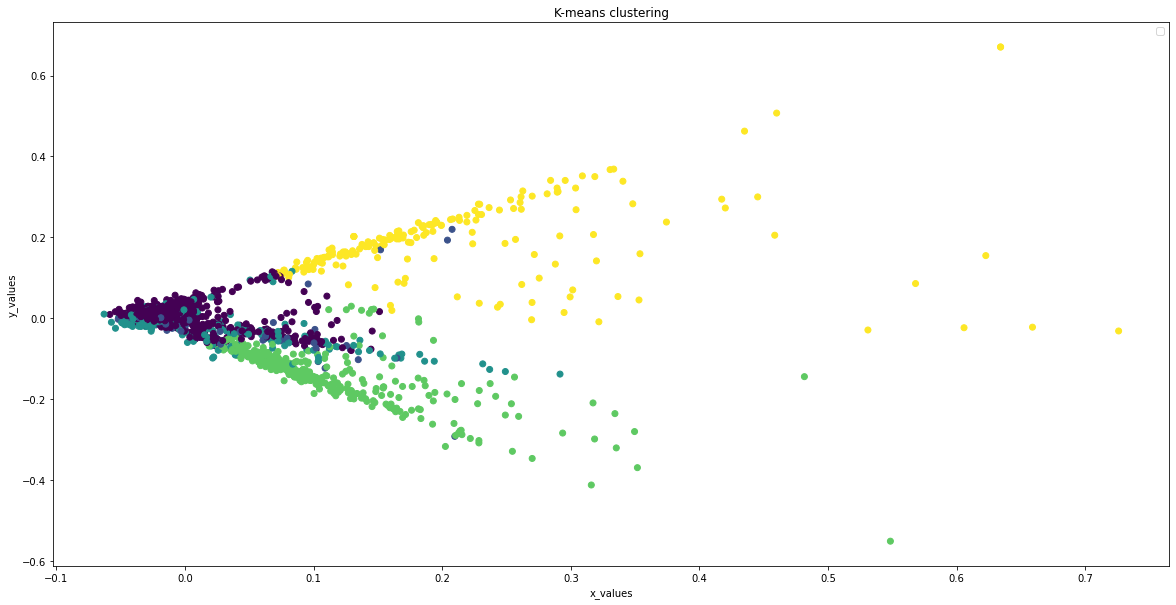

In [142]:
# Plot the clusters
from sklearn.decomposition import PCA

# create a pca object
pca = PCA(n_components=2)

# fit the pca object to the vectorizer
pca.fit(X.toarray())

# get the first two principal components
data2D = pca.transform(X.toarray())

# plot the clusters
plt.figure(figsize=(20,10))
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
# Add legend, title and axis names
plt.legend()
plt.title('K-means clustering')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

In [143]:
# Check the top 10 words in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

Cluster 0:
 shit
 fucking
 years
 country
 jewish
 white
 russia
 right
 world
 life


Cluster 1:
 nigger
 white
 niggers
 faggot
 kike
 fucking
 stupid
 thing
 fuck
 thread


Cluster 2:
 good
 women
 fuck
 time
 thing
 niggers
 white
 watch
 youtube
 shit


Cluster 3:
 people
 white
 shit
 things
 world
 black
 time
 good
 money
 rich


Cluster 4:
 jews
 white
 jewish
 people
 anti
 shit
 kanye
 jesus
 history
 race




c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [144]:
# Get 5 random comments from each cluster
for i in range(5):
    print("Cluster %d:" % i)
    for comment in df[df['cluster'] == i]['comment'].sample(5):
        print(' '.join(comment))
    print('\n')

Cluster 0:
pathological altruism great filter
idiot spooky crap evil context satanists people christmas easter satanic same retards christianity problem halloween faggot evangelicals rock roll halloween hollywood faggots razor blades apples
complete lack archeological reliable historical references that israel
midwit virus something stupid thatwe ourselves
space freedom days fleeting small tight knit communities irish


Cluster 1:
true face obsessed manlet nigger allies
nigger more places something harder
russell simmons foreskins kike masters good house nigger
fact atomwaffen division only reason anyone james masonwhat kind disconnected nigger tier clown falsehood
soviets russia ukraine competition niggers most they food niggers niggers shit money european taxpayers more nato bombs nigger countries more enrichment


Cluster 2:
asians good facts numbers they creative
gayest event past years mask fuck masks woooo
filthy koreaboos they worse weebs most koreans niggers empathy soul least 